# Ecosystems Group - Profile Datasets
*March 2019 OOI Data Labs Workshop*

Revised by Sage Lichtenwalner, August 20, 2021

**Data Goals**
* Would like to show representative profiles of Oxygen, Light, and Chlorophyll for a time at each location when Chlorphyll is high.
* Ideally one would be from:
  * an open basin, e.g. from a glider at Papa (unfortunately, the Apex profiler only starts at 200m and doesn't include PAR)
  * another above a vent, e.g. [RS01SBPS](https://datareview.marine.rutgers.edu/sites/view/RS01SBPS), 
  * and another from nearshore, e.g. [CE04OSPS](https://datareview.marine.rutgers.edu/sites/view/CE04OSPS) or Coastal Pioneer.

Because we are interested in "light" data, we can limit the sites we are interesetd in to those that have a [PAR](https://datareview.marine.rutgers.edu/instrument-classes/view/PARAD) sensor.

In [1]:
# Notebook Setup
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Setup default plot styles
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
!pip install git+https://github.com/seagrinch/ooilab.git
!pip install cmocean
import cmocean

import ooilab
ooilab.API_USERNAME = ''
ooilab.API_TOKEN = ''

  Cloning https://github.com/seagrinch/ooilab.git to /tmp/pip-req-build-wzc8grf3
  Running command git clone -q https://github.com/seagrinch/ooilab.git /tmp/pip-req-build-wzc8grf3
  Created wheel for ooilab: filename=ooilab-0.2-py3-none-any.whl size=2576 sha256=2b40315cc1795303e47e0d0f4c6d429b55b1a60216281520fb72237ac207db8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-mvbnuou5/wheels/7d/be/97/ae4c7ec95dc0cecdfaaea983025c35bb100b5b58c72245deb0
Successfully built ooilab
     |████████████████████████████████| 223 kB 5.2 MB/s 


In [3]:
# Day and Depth Binning Function
def bindata(vd,binvar,bins):
  labels = (bins[:-1] + bins[1:])/2
  a = vd.groupby_bins(binvar,bins,labels=labels).mean(dim=xr.ALL_DIMS, skipna=True)
  return a

In [4]:
# Profile Figure
def profile_figure(raw_data,profile_data):
  fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, sharex=False, sharey=True)
  fig.set_size_inches(10,8)

  ax1.plot(raw_data.seawater_temperature,raw_data.int_ctd_pressure,'.')
  ax2.plot(raw_data.practical_salinity,raw_data.int_ctd_pressure,'.')
  ax3.plot(raw_data.dissolved_oxygen,raw_data.int_ctd_pressure,'.')
  ax4.plot(raw_data.par,raw_data.int_ctd_pressure,'.')
  ax5.plot(raw_data.chl,raw_data.int_ctd_pressure,'.')

  ax1.plot(profile_data.seawater_temperature,profile_data.int_ctd_pressure,'k-')
  ax2.plot(profile_data.practical_salinity,profile_data.int_ctd_pressure,'k-')
  ax3.plot(profile_data.dissolved_oxygen,profile_data.int_ctd_pressure,'k-')
  ax4.plot(profile_data.par,profile_data.int_ctd_pressure,'k-')
  ax5.plot(profile_data.chl,profile_data.int_ctd_pressure,'k-')

  ax1.invert_yaxis()

  ax1.set_xlabel('Temperature')
  ax2.set_xlabel('Salinity')
  ax3.set_xlabel('DO')
  ax4.set_xlabel('PAR')
  ax5.set_xlabel('Chlorophyll')

  ax1.set_title(raw_data.subsite);
  ax3.set_title('%s to %s' % (np.datetime_as_string(raw_data.time.min().values,unit='D'),
                              np.datetime_as_string(raw_data.time.max().values,unit='D')));
  plt.savefig('%s.png' % (raw_data.subsite))

## GP05MOAS - Global Papa Glider 575

In [5]:
# Papa Glider
start_date = '2016-07-01T00:00:00.000Z'
end_date = '2016-07-03T00:00:00.000Z'

# ooilab.request_data('GP05MOAS-PG575-02-DOSTAM000','recovered_host','dosta_abcdjm_glider_recovered',start_date,end_date)
# ooilab.request_data('GP05MOAS-PG575-06-PARADM000','recovered_host','parad_m_glider_recovered',start_date,end_date)
# ooilab.request_data('GP05MOAS-PG575-03-FLORTM000','recovered_host','flort_m_sample',start_date,end_date)

In [6]:
glider_url_do = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T202540928Z-GP05MOAS-PG575-02-DOSTAM000-recovered_host-dosta_abcdjm_glider_recovered/catalog.html'
glider_url_par = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T202551936Z-GP05MOAS-PG575-06-PARADM000-recovered_host-parad_m_glider_recovered/catalog.html'
glider_url_flort = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T202603766Z-GP05MOAS-PG575-03-FLORTM000-recovered_host-flort_m_sample/catalog.html'

In [7]:
# Load Data
glider_do = xr.open_mfdataset(ooilab.get_filelist(glider_url_do)).swap_dims({'obs': 'time'}).sortby('time')
glider_par = xr.open_mfdataset(ooilab.get_filelist(glider_url_par)).swap_dims({'obs': 'time'}).sortby('time')
glider_flort = xr.open_mfdataset(ooilab.get_filelist(glider_url_flort)).swap_dims({'obs': 'time'}).sortby('time')


In [8]:
# Rename and clean up variables
glider_do['seawater_temperature'] = glider_do['sci_water_temp']
glider_do['dissolved_oxygen'] = glider_do['sci_abs_oxygen']
d1 = glider_do[['int_ctd_pressure','seawater_temperature','practical_salinity','dissolved_oxygen']].drop(['lon','lat','obs','depth'])

glider_par['par'] = glider_par['parad_m_par']
d2 = glider_par[['int_ctd_pressure','par']].drop(['lon','lat','obs','depth'])

glider_flort['chl'] = glider_flort['sci_flbbcd_chlor_units']
d3 = glider_flort[['int_ctd_pressure','chl']].drop(['lon','lat','obs','depth'])

# Merge Datasets
glider_data = xr.merge([d1,d2,d3])

# Clean Dataset
glider_data = glider_data.where(glider_data['int_ctd_pressure']>0)

# Fix PAR - For some reason it appears to be off by 1e6
glider_data['par'] = glider_data['par'] / 1e6

In [9]:
# Calculate binned profiles
bins = np.arange(0, 220, 2) # Output depth bins
glider_profile = bindata(glider_data,binvar='int_ctd_pressure',bins=bins)

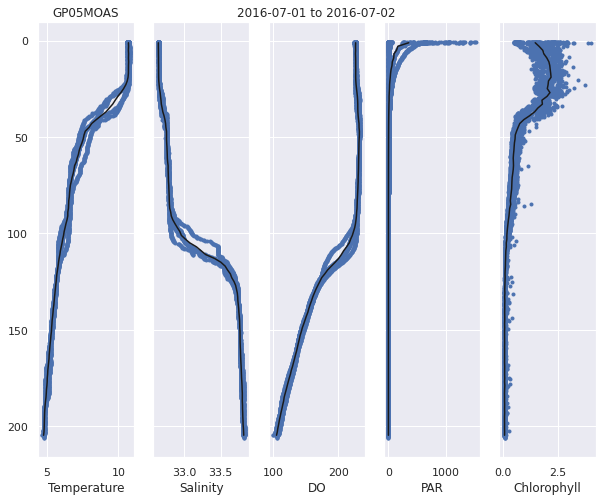

In [10]:
profile_figure(glider_data,glider_profile)

In [11]:
glider_profile.to_dataframe().to_csv('%s.csv' % (glider_data.subsite))

## RS01SBPS - Oregon Slope Base Shallow Profiler Mooring (2,906m)

In [12]:
# Oregon Slope Base
start_date = '2018-08-01T00:00:00.000Z'
end_date = '2018-08-03T00:00:00.000Z'

# ooilab.request_data('RS01SBPS-SF01A-2A-CTDPFA102','streamed','ctdpf_sbe43_sample',start_date,end_date)
# ooilab.request_data('RS01SBPS-SF01A-3C-PARADA101','streamed','parad_sa_sample',start_date,end_date)
# ooilab.request_data('RS01SBPS-SF01A-3A-FLORTD101','streamed','flort_d_data_record',start_date,end_date)

In [13]:
rs01_url_do = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T211700868Z-RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample/catalog.html'
rs01_url_par = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T211711903Z-RS01SBPS-SF01A-3C-PARADA101-streamed-parad_sa_sample/catalog.html'
rs01_url_flort = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T211722030Z-RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html'


In [14]:
rs01_do = xr.open_mfdataset(ooilab.get_filelist(rs01_url_do)).swap_dims({'obs': 'time'}).sortby('time')
rs01_par = xr.open_mfdataset(ooilab.get_filelist(rs01_url_par)).swap_dims({'obs': 'time'}).sortby('time')
rs01_flort = xr.open_mfdataset(ooilab.get_filelist(rs01_url_flort)).swap_dims({'obs': 'time'}).sortby('time')

In [15]:
# Rename and clean up variables
rs01_do['int_ctd_pressure'] = rs01_do['seawater_pressure']
rs01_do['dissolved_oxygen'] = rs01_do['corrected_dissolved_oxygen']
d1 = rs01_do[['int_ctd_pressure','seawater_temperature','practical_salinity','dissolved_oxygen']].drop(['lon','lat','obs','depth'])

rs01_par['par'] = rs01_par['par_counts_output']
d2 = rs01_par[['int_ctd_pressure','par']].drop(['lon','lat','obs','depth'])

rs01_flort['chl'] = rs01_flort['fluorometric_chlorophyll_a']
d3 = rs01_flort[['int_ctd_pressure','chl']].drop(['lon','lat','obs','depth'])

# Merge Datasets
rs01_data = xr.merge([d1,d2,d3])

In [16]:
# Calculate binned profiles
bins = np.arange(0, 200, 2) # Output depth bins
rs01_profile = bindata(rs01_data,binvar='int_ctd_pressure',bins=bins)

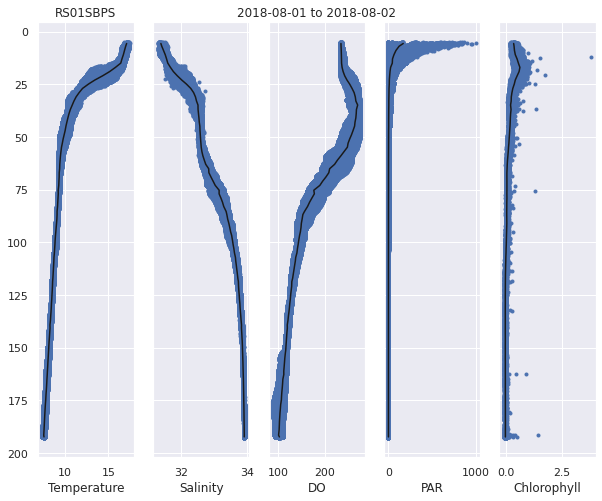

In [17]:
profile_figure(rs01_data,rs01_profile)

In [18]:
rs01_profile.to_dataframe().to_csv('%s.csv' % (rs01_data.subsite))

## CP02PMUO Pioneer Upstream Offshore Profiler Mooring (452m)

In [19]:
# Pioneer Upstream Offshore
start_date = '2018-08-01T00:00:00.000Z'
end_date = '2018-08-03T00:00:00.000Z'

# ooilab.request_data('CP02PMUO-WFP01-02-DOFSTK000','recovered_wfp','dofst_k_wfp_instrument_recovered',start_date,end_date)
# ooilab.request_data('CP02PMUO-WFP01-05-PARADK000','recovered_wfp','parad_k__stc_imodem_instrument_recovered',start_date,end_date)
# ooilab.request_data('CP02PMUO-WFP01-04-FLORTK000','recovered_wfp','flort_sample',start_date,end_date)


In [20]:
cp02_url_do = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T212630751Z-CP02PMUO-WFP01-02-DOFSTK000-recovered_wfp-dofst_k_wfp_instrument_recovered/catalog.html'
cp02_url_par = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T212721693Z-CP02PMUO-WFP01-05-PARADK000-recovered_wfp-parad_k__stc_imodem_instrument_recovered/catalog.html'
cp02_url_flort = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210820T212733605Z-CP02PMUO-WFP01-04-FLORTK000-recovered_wfp-flort_sample/catalog.html'


In [21]:
cp02_do = xr.open_mfdataset(ooilab.get_filelist(cp02_url_do)).swap_dims({'obs': 'time'}).sortby('time')
cp02_par = xr.open_mfdataset(ooilab.get_filelist(cp02_url_par)).swap_dims({'obs': 'time'}).sortby('time')
cp02_flort = xr.open_mfdataset(ooilab.get_filelist(cp02_url_flort)).swap_dims({'obs': 'time'}).sortby('time')

In [22]:
# Rename and clean up variables
cp02_do['seawater_temperature'] = cp02_do['ctdpf_ckl_seawater_temperature']
cp02_do['dissolved_oxygen'] = cp02_do['dofst_k_oxygen_l2']
d1 = cp02_do[['int_ctd_pressure','seawater_temperature','practical_salinity','dissolved_oxygen']].drop(['lon','lat','obs','depth'])

cp02_par['par'] = cp02_par['parad_k_par']
d2 = cp02_par[['int_ctd_pressure','par']].drop(['lon','lat','obs','depth'])

cp02_flort['chl'] = cp02_flort['fluorometric_chlorophyll_a']
d3 = cp02_flort[['int_ctd_pressure','chl']].drop(['lon','lat','obs','depth'])

# Merge Datasets
cp02_data = xr.merge([d1,d2,d3])

In [23]:
# Calculate binned profiles
bins = np.arange(0, 450, 2) # Output depth bins
cp02_profile = bindata(cp02_data,binvar='int_ctd_pressure',bins=bins)

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


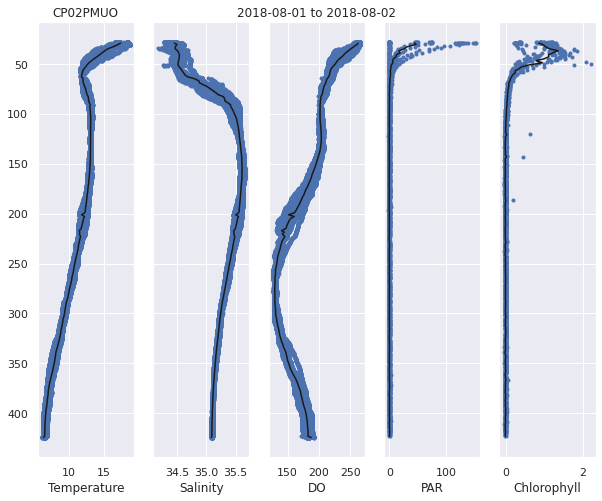

In [24]:
profile_figure(cp02_data,cp02_profile)

In [25]:
cp02_profile.to_dataframe().to_csv('%s.csv' % (cp02_data.subsite))

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
